In [1]:
import os
import random
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SEED = 31
FOLDS = 3
ESTIMATORS = 1000
SCORING = make_scorer(cohen_kappa_score, weights='quadratic')
TARGET = 'accuracy_group'
PREDICTORS = ['type_activity', 'type_assessment', 'type_clip', 'type_game', 'world_crystalcaves',
       'world_magmapeak', 'world_treetopcity', 'world_none',
       'title_12_monkeys', 'title_air_show', 'title_all_star_sorting',
       'title_balancing_act', 'title_bird_measurer',
       'title_bottle_filler', 'title_bubble_bath', 'title_bug_measurer',
       'title_cart_balancer', 'title_cauldron_filler',
       'title_chest_sorter', 'title_chicken_balancer', 'title_chow_time',
       'title_costume_box', 'title_crystal_caves_1',
       'title_crystal_caves_2', 'title_crystal_caves_3',
       'title_crystals_rule', 'title_dino_dive', 'title_dino_drink',
       'title_egg_dropper', 'title_fireworks', 'title_flower_waterer',
       'title_happy_camel', 'title_heavy', 'title_honey_cake',
       'title_leaf_leader', 'title_lifting', 'title_magma_peak_1',
       'title_magma_peak_2', 'title_mushroom_sorter',
       'title_ordering_spheres', 'title_pan_balance', 'title_pirate_tale',
       'title_rulers', 'title_sandcastle', 'title_scrub', 'title_slop',
       'title_treasure_map', 'title_treetop_city_1',
       'title_treetop_city_2', 'title_treetop_city_3',
       'title_watering_hole', 'title_welcome', 'event_2000',
       'event_2000_activity', 'event_2000_assessment', 'event_2000_clip',
       'event_2000_game', 'event_2010', 'event_2010_activity',
       'event_2010_assessment', 'event_2010_clip', 'event_2010_game',
       'event_2020', 'event_2020_activity', 'event_2020_assessment',
       'event_2020_clip', 'event_2020_game', 'event_2025',
       'event_2025_activity', 'event_2025_assessment', 'event_2025_clip',
       'event_2025_game', 'event_2030', 'event_2030_activity',
       'event_2030_assessment', 'event_2030_clip', 'event_2030_game',
       'event_2035', 'event_2035_activity', 'event_2035_assessment',
       'event_2035_clip', 'event_2035_game', 'event_2040',
       'event_2040_activity', 'event_2040_assessment', 'event_2040_clip',
       'event_2040_game', 'event_2050', 'event_2050_activity',
       'event_2050_assessment', 'event_2050_clip', 'event_2050_game',
       'event_2060', 'event_2060_activity', 'event_2060_assessment',
       'event_2060_clip', 'event_2060_game', 'event_2070',
       'event_2070_activity', 'event_2070_assessment', 'event_2070_clip',
       'event_2070_game', 'event_2075', 'event_2075_activity',
       'event_2075_assessment', 'event_2075_clip', 'event_2075_game',
       'event_2080', 'event_2080_activity', 'event_2080_assessment',
       'event_2080_clip', 'event_2080_game', 'event_2081',
       'event_2081_activity', 'event_2081_assessment', 'event_2081_clip',
       'event_2081_game', 'event_2083', 'event_2083_activity',
       'event_2083_assessment', 'event_2083_clip', 'event_2083_game',
       'event_3010', 'event_3010_activity', 'event_3010_assessment',
       'event_3010_clip', 'event_3010_game', 'event_3020',
       'event_3020_activity', 'event_3020_assessment', 'event_3020_clip',
       'event_3020_game', 'event_3021', 'event_3021_activity',
       'event_3021_assessment', 'event_3021_clip', 'event_3021_game',
       'event_3110', 'event_3110_activity', 'event_3110_assessment',
       'event_3110_clip', 'event_3110_game', 'event_3120',
       'event_3120_activity', 'event_3120_assessment', 'event_3120_clip',
       'event_3120_game', 'event_3121', 'event_3121_activity',
       'event_3121_assessment', 'event_3121_clip', 'event_3121_game',
       'event_4010', 'event_4010_activity', 'event_4010_assessment',
       'event_4010_clip', 'event_4010_game', 'event_4020',
       'event_4020_activity', 'event_4020_assessment', 'event_4020_clip',
       'event_4020_game', 'event_4021', 'event_4021_activity',
       'event_4021_assessment', 'event_4021_clip', 'event_4021_game',
       'event_4022', 'event_4022_activity', 'event_4022_assessment',
       'event_4022_clip', 'event_4022_game', 'event_4025',
       'event_4025_activity', 'event_4025_assessment', 'event_4025_clip',
       'event_4025_game', 'event_4030', 'event_4030_activity',
       'event_4030_assessment', 'event_4030_clip', 'event_4030_game',
       'event_4031', 'event_4031_activity', 'event_4031_assessment',
       'event_4031_clip', 'event_4031_game', 'event_4035',
       'event_4035_activity', 'event_4035_assessment', 'event_4035_clip',
       'event_4035_game', 'event_4040', 'event_4040_activity',
       'event_4040_assessment', 'event_4040_clip', 'event_4040_game',
       'event_4045', 'event_4045_activity', 'event_4045_assessment',
       'event_4045_clip', 'event_4045_game', 'event_4050',
       'event_4050_activity', 'event_4050_assessment', 'event_4050_clip',
       'event_4050_game', 'event_4070', 'event_4070_activity',
       'event_4070_assessment', 'event_4070_clip', 'event_4070_game',
       'event_4080', 'event_4080_activity', 'event_4080_assessment',
       'event_4080_clip', 'event_4080_game', 'event_4090',
       'event_4090_activity', 'event_4090_assessment', 'event_4090_clip',
       'event_4090_game', 'event_4095', 'event_4095_activity',
       'event_4095_assessment', 'event_4095_clip', 'event_4095_game',
       'event_4100', 'event_4100_activity', 'event_4100_assessment',
       'event_4100_clip', 'event_4100_game', 'event_4110',
       'event_4110_activity', 'event_4110_assessment', 'event_4110_clip',
       'event_4110_game', 'event_4220', 'event_4220_activity',
       'event_4220_assessment', 'event_4220_clip', 'event_4220_game',
       'event_4230', 'event_4230_activity', 'event_4230_assessment',
       'event_4230_clip', 'event_4230_game', 'event_4235',
       'event_4235_activity', 'event_4235_assessment', 'event_4235_clip',
       'event_4235_game', 'event_5000', 'event_5000_activity',
       'event_5000_assessment', 'event_5000_clip', 'event_5000_game',
       'event_5010', 'event_5010_activity', 'event_5010_assessment',
       'event_5010_clip', 'event_5010_game', 'game_time_p50',
       'event_count_p50', 'game_time_last_session',
       'event_count_last_session']

In [3]:
def _init():
    # Characters such as empty strings '' or numpy.inf are considered NA values
    pd.set_option('use_inf_as_na', True)
    pd.set_option('display.max_columns', 999)
    pd.set_option('display.max_rows', 999)
    
    
_init()

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(SEED)

In [5]:
file_folder = '../input/dsbowl19-preprocess'
train = pd.read_parquet(f'{file_folder}/train.parquet')
test = pd.read_parquet(f'{file_folder}/test.parquet')
train.info(max_cols=999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 268 columns):
accuracy_group              3614 non-null object
installation_id             3614 non-null object
type_activity               3614 non-null int32
type_assessment             3614 non-null int32
type_clip                   3614 non-null int32
type_game                   3614 non-null int32
world_crystalcaves          3614 non-null int32
world_magmapeak             3614 non-null int32
world_treetopcity           3614 non-null int32
world_none                  3614 non-null int32
title_12_monkeys            3614 non-null int32
title_air_show              3614 non-null int32
title_all_star_sorting      3614 non-null int32
title_balancing_act         3614 non-null int32
title_bird_measurer         3614 non-null int32
title_bottle_filler         3614 non-null int32
title_bubble_bath           3614 non-null int32
title_bug_measurer          3614 non-null int32
title_cart_balancer       

In [6]:
test.info(max_cols=999)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 267 columns):
installation_id             1000 non-null object
type_activity               1000 non-null int32
type_assessment             1000 non-null int32
type_clip                   1000 non-null int32
type_game                   1000 non-null int32
world_crystalcaves          1000 non-null int32
world_magmapeak             1000 non-null int32
world_treetopcity           1000 non-null int32
world_none                  1000 non-null int32
title_12_monkeys            1000 non-null int32
title_air_show              1000 non-null int32
title_all_star_sorting      1000 non-null int32
title_balancing_act         1000 non-null int32
title_bird_measurer         1000 non-null int32
title_bottle_filler         1000 non-null int32
title_bubble_bath           1000 non-null int32
title_bug_measurer          1000 non-null int32
title_cart_balancer         1000 non-null int32
title_cauldron_filler       

In [7]:
train.columns.values

array(['accuracy_group', 'installation_id', 'type_activity',
       'type_assessment', 'type_clip', 'type_game', 'world_crystalcaves',
       'world_magmapeak', 'world_treetopcity', 'world_none',
       'title_12_monkeys', 'title_air_show', 'title_all_star_sorting',
       'title_balancing_act', 'title_bird_measurer',
       'title_bottle_filler', 'title_bubble_bath', 'title_bug_measurer',
       'title_cart_balancer', 'title_cauldron_filler',
       'title_chest_sorter', 'title_chicken_balancer', 'title_chow_time',
       'title_costume_box', 'title_crystal_caves_1',
       'title_crystal_caves_2', 'title_crystal_caves_3',
       'title_crystals_rule', 'title_dino_dive', 'title_dino_drink',
       'title_egg_dropper', 'title_fireworks', 'title_flower_waterer',
       'title_happy_camel', 'title_heavy', 'title_honey_cake',
       'title_leaf_leader', 'title_lifting', 'title_magma_peak_1',
       'title_magma_peak_2', 'title_mushroom_sorter',
       'title_ordering_spheres', 'title_pan_

In [8]:
%%time
y_train = train[TARGET]
x_train = train[PREDICTORS]
model = LGBMClassifier(n_estimators=ESTIMATORS, reg_alpha=1)
pipe = Pipeline([('model', model)])
param_grid = {
    'model__learning_rate': [0.01],
    'model__num_leaves': [80],
    'model__min_child_samples': [200],
    'model__colsample_bytree': [0.5]
}
cv = GridSearchCV(pipe, cv=FOLDS, param_grid=param_grid, scoring=SCORING)
#cv.fit(x_train, y_train, model__early_stopping_rounds=200, model__verbose=500)
cv.fit(x_train, y_train)
print('best_params_={}\nbest_score_={}'.format(repr(cv.best_params_), repr(cv.best_score_)))

best_params_={'model__colsample_bytree': 0.5, 'model__learning_rate': 0.01, 'model__min_child_samples': 200, 'model__num_leaves': 80}
best_score_=0.7432200546363349
Wall time: 14.8 s


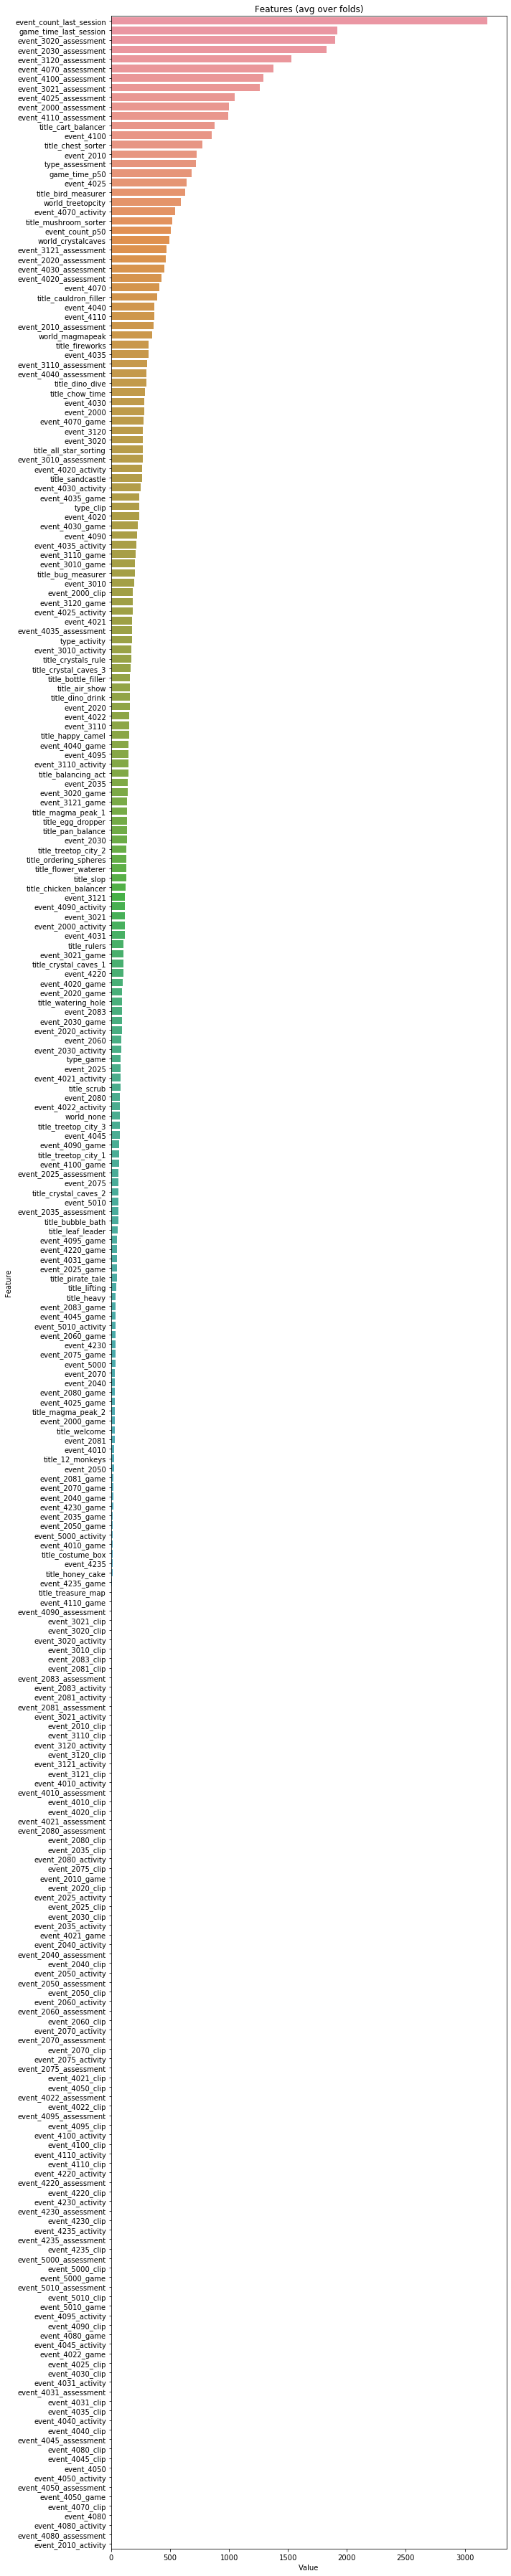

<Figure size 432x288 with 0 Axes>

In [9]:
def _plot_importance(values, features, figsize):
    feature_imp = pd.DataFrame(sorted(zip(values, features)), columns=['Value','Feature'])
    plt.figure(figsize=figsize)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.show()
    plt.savefig('importances-01.png')
    
    
_plot_importance(
    values=cv.best_estimator_['model'].feature_importances_,
    features=x_train.columns,
    figsize=(10, 50)
)

In [10]:
x_test = test[PREDICTORS]
sub = test[['installation_id']].copy()
#sub[TARGET] = cv.predict_proba(x_test)[:,1]
sub[TARGET] = cv.predict(x_test)
sub.head(10)

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,0
3,01a44906,0
4,01bc6cb6,0
5,02256298,3
6,0267757a,0
7,027e7ce5,3
8,02a29f99,0
9,0300c576,0


In [11]:
sub.to_csv('submission.csv', index=False)
print(os.listdir("."))

['.ipynb_checkpoints', 'dsbowl19-lgb.ipynb', 'dsbowl19-preprocess.ipynb', 'importances-01.png', 'lgbm_importances-01.png', 'submission.csv', 'test.parquet', 'train.parquet']
